In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# load data as dataframe
df = pd.read_csv('../datasets/iris.csv')

In [3]:
# data shape
print('Shape: ', df.shape)

Shape:  (150, 5)


In [4]:
X=df.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=df.loc[:,'Class']

In [5]:
# scaling and split
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=True, random_state=42)

In [6]:
# learning
clf = LogisticRegression(penalty='l2', C=100.0, random_state=42)
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [7]:
# evaluation
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 16,  1],
       [ 0,  1,  9]])

In [8]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy =', acc)

Accuracy = 0.9555555555555556


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# 交差検証
scores = cross_val_score(clf, X, y,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.96666667 0.96666667 0.86666667 1.         0.96666667]
Average score: 0.9533333333333334


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [10]:
report = classification_report(y_test, y_pred)
print(report)

                  precision    recall  f1-score   support

     Iris-setosa       1.00      1.00      1.00        18
 Iris-versicolor       0.94      0.94      0.94        17
  Iris-virginica       0.90      0.90      0.90        10

       micro avg       0.96      0.96      0.96        45
       macro avg       0.95      0.95      0.95        45
    weighted avg       0.96      0.96      0.96        45



In [11]:
# analyze results
print('y = {} * x + {}'.format(clf.coef_, clf.intercept_))

y = [[-1.3326723   2.59255149 -4.14123508 -3.76630707]
 [-0.19488593 -1.20527547  2.2349129  -2.02057962]
 [-1.4611524  -1.63059817  9.90301195  8.35952552]] * x + [ -4.2377876   -0.99779147 -11.65725575]


In [12]:
odds = np.exp(clf.coef_).flatten()
odds_df = pd.DataFrame([df.columns, odds], index=['features', 'odds']).T

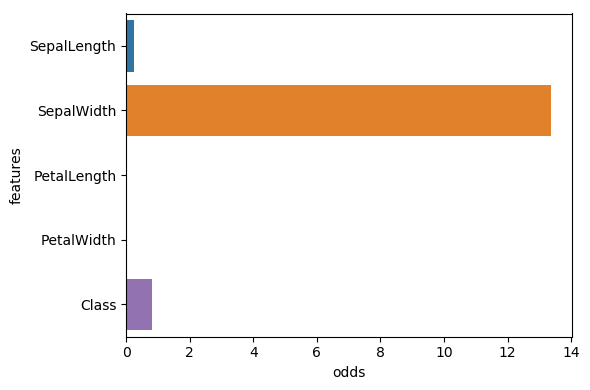

In [13]:
plt.figure(dpi=100)
sns.barplot(x=odds_df['odds'], y=odds_df['features'])
plt.tight_layout()

In [14]:
coef_df = pd.DataFrame([df.columns,
                        clf.coef_.flatten()], index=['features', 'coef']).T

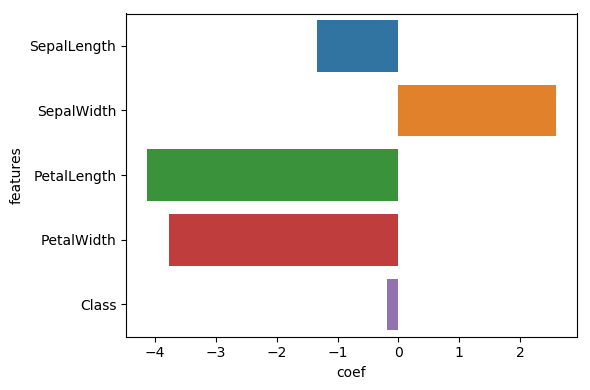

In [15]:
plt.figure(dpi=100)
sns.barplot(x=coef_df['coef'], y=coef_df['features'])
plt.tight_layout()